# Iris dataset

- Has 150 samples
- Consists of 4 features and 1 target

## Features

- Sepal length
- Sepal width
- Petal length
- Petal width


## Target

The target is a number which indicates the class

target = 1 => the sample is an iris setosa
target = 2 => the sample is an iris versicolor
target = 3 => the sample is an iris virginica

In [ ]:
# SVM Classification
from sklearn import datasets
from sklearn import metrics
from sklearn.svm import SVC
import pandas as pd

In [ ]:
# load the iris datasets
# for info on this dataset, refer to the logistic_regression script
dataset = datasets.load_iris()

In [ ]:
list(dataset.target_names)

In [ ]:
#Let us now build a pandas dataframe hosting the data at hand

# We first need the list of feature names for our columns
# It is already stored in the dataset. Let's use it
lfeat = dataset.feature_names
lfeat

In [ ]:
dataset.target[[10,25,50]]

In [ ]:
dataset

In [ ]:
# We now build the Dataframe, with the data as argument
# and the list of column names as keyword argument
df_iris = pd.DataFrame(dataset.data, columns = lfeat)

In [ ]:
# Let's have a look at the first few entries
print "Printing data up to the 5th sample"
df_iris.iloc[:5,:] # Look at the first 5 samples for all features.

In [ ]:
df_iris["Species"] = dataset.target # Must have the correct size of course

In [ ]:
#Let's review our complete dataframe:
print
print "Printing data up to the 5th sample"
print "Also print the target"
df_iris.iloc[:5,:] # Look at the first 5 samples for all features incuding target

In [ ]:
# We are now going to fit a SVC model to the data

# Support vector Machines (SVM) arise from the desire to find an optimal separating hyperplane
# for the data belonging to two classes.
# This is best visualised with a simple example :
# Assume we are given 2D data, 2 classes, each class in a well separated cluster.
# The 2 classes can be separated by an infinity of linear boundaries
# The boundary found by an SVC will find the highest distance d,
# such that all points from class 1 are at least a distance d from the boundary line
# and likewise for points of class 2. (1)

# This problem can be formulated as a convex optimisation problem under some constraints
# which can be solved by standard software 

# The SVM can be modified to tackle non linear boundaries and can be given more flexibility
# by allowing data points to violate condition (1)
# but this is slightly more advanced.

#As before, we create an instance of the model
model = SVC()

In [ ]:
# Which we then fit to the training data X, Y
# with pandas we have to split the df in two :
# the feature part (X) and the target part (Y)
# This is done below :

data = df_iris[lfeat].values
target = df_iris["Species"].values
model.fit(data, target)
print(model)

In [ ]:
# make predictions
# as before, we can use the model to make predictions on any data
expected = target
predicted = model.predict(data)
# and evaluate the performance of the classification with standard metrics
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

# Business formulation

Back to example from the logisic regression.

In real life, classification problems are everywhere
Assume you are part of the university board overseeing admissions
You receive a lot of applications that you want to sort
You are looking to create 2 groups of students
1) Probably bad 2) Probably good candidates
You can check the applications one by one (browsing academic record, cover letter etc)
But you would like to come up with an automatic way to do it, as a cross check.

How do we do that ?

Assume we are given students and some data for each student (age, gpa, gpa last year, extra scholar activities...)
We will see how we can use this data to come up with an efficient classification

What is the simplest thing we can do ?

We could think of first making a simple decision :
Students with GPA > 3  are probably good candidates and students with GPA <3 are probably bad candidates

Mathematically, what we have done here is a linear separation of the students
Think of it as drawing straight horizontal lines to separate the distribution of student's GPA
into two groups.

Do we have a way to find the optimal boundaries ? i.e. choosing the boundaries such that
the students' capabilities are assessed correctly ?

SVC gives you a criteria to find the best boundary
see picture svm_classification.png

There are many ways to separate the two populations of students (thing gray lines)
with a linear boundary
SVC gives you a "best separation" in the sense that all points of each class should be at a distance >= D 
from the boundary
and SVC gives you the boundary with the highest distance D 
in the picture, D is the grey dotted line

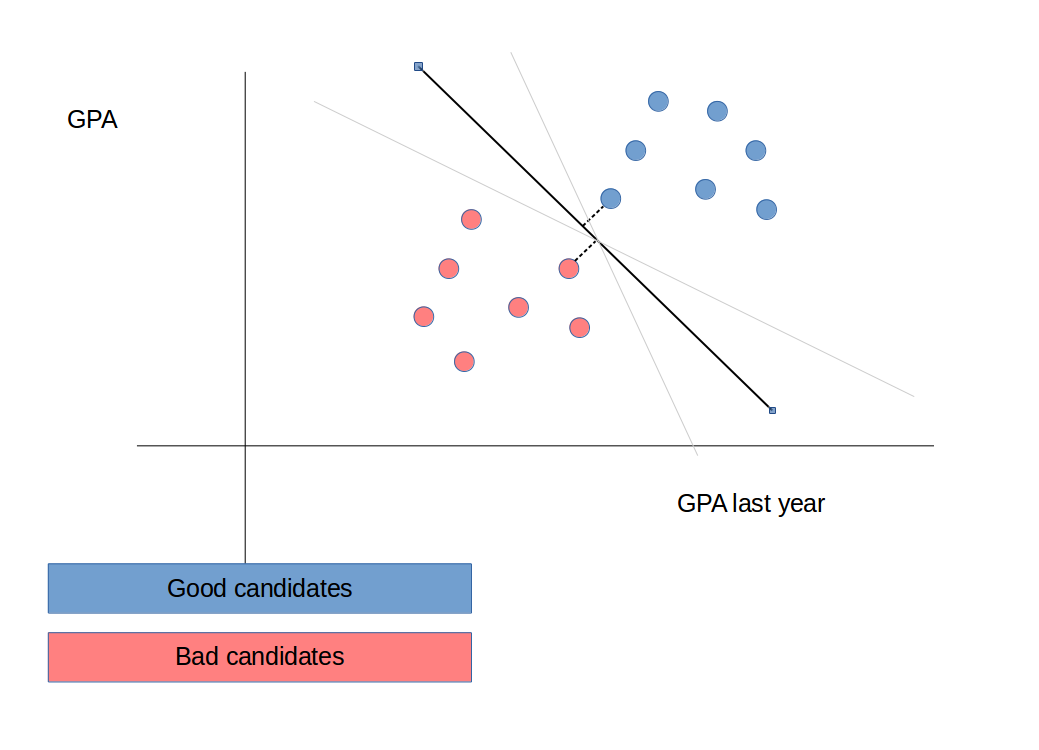

In [21]:
from IPython.display import Image
Image('figures/svm_classification.png')